# Genetic Drift

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Population-Dynamics-Simulation" data-toc-modified-id="Population-Dynamics-Simulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Population Dynamics Simulation</a></span></li><li><span><a href="#Different-n_initial" data-toc-modified-id="Different-n_initial-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Different n_initial</a></span></li></ul></div>

## Introduction

Assume, there is a population of individuals that reproduce without mutation. Each individual has an equal chance
to give rise to an individual in the new generation. The new generation is generated synchronously maintaining the
same size as the population of the old generation. As a result, some parents will end up having multiple offsprings,
while some parents will give rise to no offsprings.

We calculate the time to the most recent common ancestor (MRCA) and compare it to an analytical statistical approximation of the expected TMRCA.

## Imports

In [1]:
# Data manipulation
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Population Dynamics Simulation
Simulate the dynamics of this population.

• Create a random population having n different individuals.

• Keep producing a new generation of the same size as the old one. Stop simulation, when all individuals
of the new generation have the same ancestor.


In [3]:
def MRCA(n_initial):
    """
    Calculates random development of a population of size n_initial.

    Args:
        n_initial (int): Number of initial individuals in population.

    Returns:
        population (array): Population Development Stages
        parents (array): Linking instances in population array
        generations (int): Number of generations until homogenity
        TMRCA (int): Time to Most Recent Common Ancestor
    """

    # Initialise all arrays
    init = np.array(range(n_initial))
    population = []
    parents = []
    population.append(list(init))
    parents.append(list(init))

    # Generate sequences until homogenity
    while not all(x == init[0] for x in init):
        rand_int = np.random.randint(0, n_initial, n_initial)
        init[:] = init[rand_int]
        parents.append(list(rand_int))
        population.append(list(init))
    
    #Number of generations, search frame
    generations = len(parents)-1
    current = parents[-1]

    # Iterate back through parents path
    TMRCA, pool = 0, []
    while len(current) > 1:
        # Track each element
        for i in range(len(current)):
            previous = parents[generations-TMRCA][current[i]]
            # If previous in pool --> Common Ancestor
            if previous not in pool:
                pool.append(previous)
        # Update current frame
        current = pool.copy()
        pool.clear()
        # For each row add tick to Time until MRCA
        TMRCA += 1

    return population, parents, generations, TMRCA

population, parents, generations, TMRCA  = MRCA(10)
population


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [5, 1, 2, 2, 5, 1, 1, 0, 2, 1],
 [2, 1, 1, 1, 0, 5, 2, 1, 5, 0],
 [2, 1, 1, 0, 2, 1, 1, 1, 5, 5],
 [0, 2, 1, 0, 1, 1, 0, 0, 1, 1],
 [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
 [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 0, 1, 0, 1, 1, 1, 1, 1, 0],
 [1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
 [1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
 [0, 1, 0, 1, 1, 0, 1, 1, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
 [1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

## Different n_initial 
Create populations having 10, 30, 100, 300 and 1000 different individuals. Simulate their dynamics as described
above.


• For each population calculate the time to the most recent common ancestor (MRCA). Repeat this
procedure 100 times.

• Plot the histograms of times to MRCA for each population size. Calculate mean and standard deviation.

• Plot the dependence of average time to MRCA vs. the population size, and also plot the analytical result
for corresponding population sizes (see the lecture).

In [9]:
n_initials = [10, 30, 100, 300, 1000]
repetitions = 100
TMRCA_df = []
TMRCA_df = np.zeros((len(n_initials), repetitions))
for i in range(len(n_initials)):
    for n in range(repetitions):
        TMRCA_df[i][n] = MRCA(n_initials[i])[3]

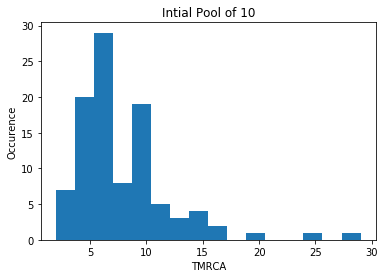

Mean: 7
Standard Deviation: 4
Estimated Analytical: 20


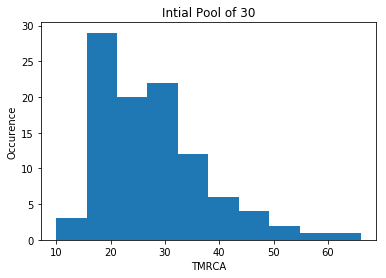

Mean: 27
Standard Deviation: 9
Estimated Analytical: 60


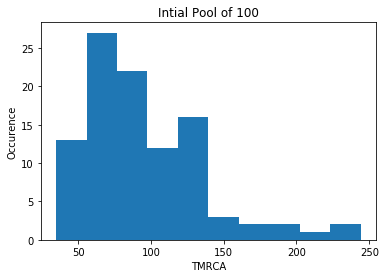

Mean: 95
Standard Deviation: 41
Estimated Analytical: 200


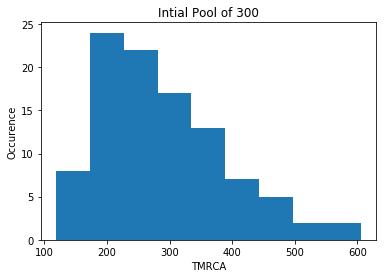

Mean: 290
Standard Deviation: 99
Estimated Analytical: 600


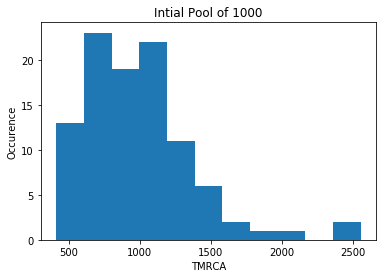

Mean: 991
Standard Deviation: 393
Estimated Analytical: 2000


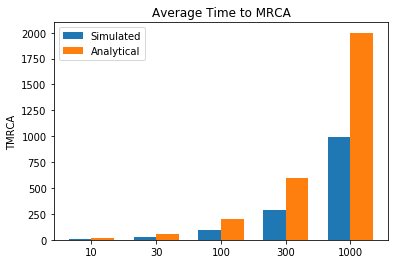

In [49]:
# Histograms Occurence Plots
for n in range(len(n_initials)):
    plt.hist(np.array(TMRCA_df[n]), bins='auto')
    plt.title('Intial Pool of %d' % n_initials[n])
    plt.xlabel('TMRCA')
    plt.ylabel('Occurence')
    plt.show()
    print("Mean: %d" % np.mean(TMRCA_df[n]))
    print("Standard Deviation: %d" % np.std(TMRCA_df[n]))
    print("Estimated Analytical: %d" % (n_initials[n]*2))

# Histograms Average TMRCA
width = 0.35
y = np.arange(len(n_initials))
plt.bar(y, [np.mean(x) for x in TMRCA_df], width, label='Simulated')
plt.bar(y+width, [2*n for n in n_initials], width, label='Analytical')
plt.xticks(y + width / 2, n_initials)
plt.title('Average Time to MRCA')
plt.ylabel('TMRCA')
plt.legend(loc='best')
plt.show()